In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv('scaled_data.csv')

data.head()

,Leff,Vth,Tox,Vdd,Power dissipation (W),Delay (s)
0,0.593985,0.559399,0.157895,0.228917,18.1,1.92
1,0.454887,0.408498,0.368421,0.245822,17.9,1.48
2,0.676692,0.185911,0.236842,0.346928,22.7,1.18
3,0.458647,0.513015,0.342105,0.366385,22.2,1.51
4,0.890977,0.331817,0.473684,0.206502,11.6,2.54


### Different regression models

### Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

def linear_model(x_train, y_train):
    
    print("Linear Regression ")
    linear_regression = LinearRegression()
    
    linear_regression.fit(x_train, y_train)
    
    return linear_regression

### Lasso Regression

In [4]:
from sklearn.linear_model import Lasso

def lasso_model(x_train, y_train):
    
    print("Lasso Regression")
    lasso_regression = Lasso(alpha=0.1, max_iter=10000)
    
    lasso_regression.fit(x_train, y_train)
    
    return lasso_regression

### Ridge regression

In [5]:
from sklearn.linear_model import Ridge

def ridge_model(x_train, y_train):
    
    print("Ridge Regression")
    ridge_regression = Ridge(alpha=0.5)
    
    ridge_regression.fit(x_train, y_train)
    
    return ridge_regression

In [6]:
def build_and_train_model(data, target_name, reg_fn):
    
    X = data.drop(target_name, axis=1)
    Y = data[target_name]
    
    x_train, x_test, y_train, y_test = \
        train_test_split(X, Y, test_size = 0.3, random_state=0)

    model = reg_fn(x_train, y_train)
    
    score = model.score(x_train, y_train)
    print("Training Score : ", score)

    y_pred = model.predict(x_test)
    
    r_score = r2_score(y_test, y_pred)
    print("Testing Score : ", r_score)
    
    plt.figure(figsize=(5,5))
    plt.scatter(y_test,y_pred)
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.title('Actual vs Predicted')
    
    return {'model' : model, 
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test, 
            'y_pred' : y_pred
           }

In [7]:
cols=list(data.columns)

In [8]:
cols.pop(-1)

'Delay (s)'

In [9]:
cols

['Leff', 'Vth', 'Tox', 'Vdd', 'Power dissipation (W)']

In [10]:
df1=data[cols]

In [11]:
cols.pop(-1)

'Power dissipation (W)'

In [12]:
cols.append('Delay (s)')

In [13]:
cols

['Leff', 'Vth', 'Tox', 'Vdd', 'Delay (s)']

In [14]:
df2=data[cols]

Linear Regression 
Training Score :  0.6708009393442804
Testing Score :  0.7107532900972597


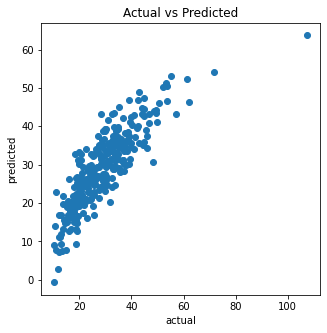

In [15]:
linear_reg1 = build_and_train_model(df1,"Power dissipation (W)", linear_model)

Linear Regression 
Training Score :  0.24002626862012522
Testing Score :  0.31156250755312664


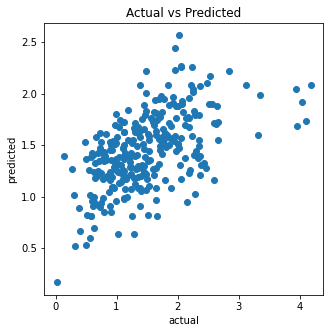

In [16]:
linear_reg2 = build_and_train_model(df2,"Delay (s)", linear_model)

Lasso Regression
Training Score :  0.6644186745930932
Testing Score :  0.7121335302521554


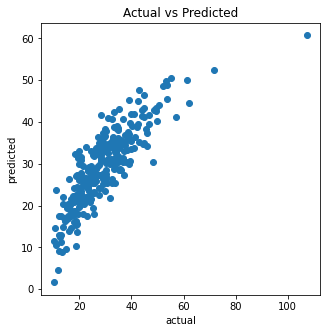

In [17]:
lasso_reg1 = build_and_train_model(df1,"Power dissipation (W)" , lasso_model)

Lasso Regression
Training Score :  0.0
Testing Score :  -0.002297160254949082


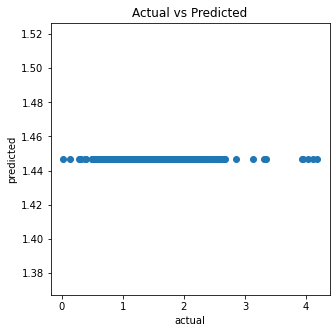

In [18]:
lasso_reg2 = build_and_train_model(df2,"Delay (s)" , lasso_model)

Ridge Regression
Training Score :  0.6698369596063452
Testing Score :  0.7110651085063644


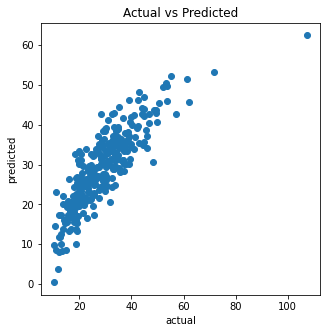

In [19]:
ridge_reg1 = build_and_train_model(df1, "Power dissipation (W)", ridge_model)

Ridge Regression
Training Score :  0.23967729253197312
Testing Score :  0.31004529307603135


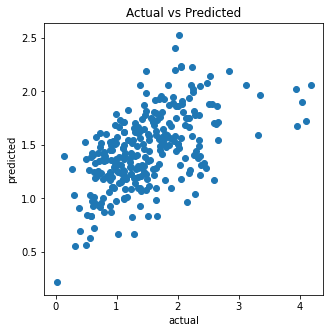

In [20]:
ridge_reg2 = build_and_train_model(df2, "Delay (s)", ridge_model)

### SGD Regression

In [21]:
from sklearn.linear_model import SGDRegressor

def sgd_model(x_train, y_train):
    
    print("SGD Regression")
    sgd_regression = SGDRegressor(max_iter=4000)
    
    sgd_regression.fit(x_train, y_train)
    
    return sgd_regression

SGD Regression
Training Score :  0.6677871009120859
Testing Score :  0.7080956189896237


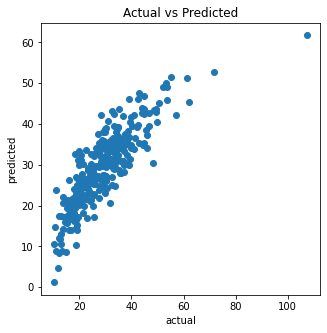

In [22]:
sgd_reg1 = build_and_train_model(df1, "Power dissipation (W)", sgd_model)

SGD Regression
Training Score :  0.02815709671240252
Testing Score :  0.054849015367214426


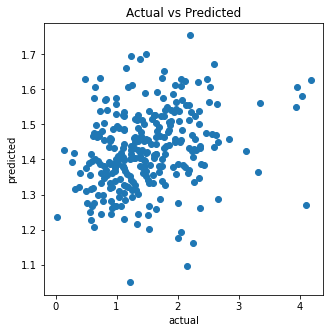

In [23]:
sgd_reg2 = build_and_train_model(df2, "Delay (s)", sgd_model)

### Ordinary Least squares

In [24]:
import numpy as np
import statsmodels.api as sm

In [25]:
X1 = df1.drop('Power dissipation (W)',axis=1).to_numpy()

In [26]:
X1[:5]

array([[0.59398496, 0.55939874, 0.15789474, 0.22891743],
       [0.45488722, 0.40849826, 0.36842105, 0.2458225 ],
       [0.67669173, 0.18591127, 0.23684211, 0.34692783],
       [0.45864662, 0.51301473, 0.34210526, 0.36638492],
       [0.89097744, 0.3318169 , 0.47368421, 0.20650195]])

In [27]:
Y1 = df1['Power dissipation (W)'] 

In [28]:
X1 = sm.add_constant(X1)

In [29]:
model1 = sm.OLS(Y1, X1).fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Power dissipation (W)   R-squared:                       0.684
Model:                               OLS   Adj. R-squared:                  0.683
Method:                    Least Squares   F-statistic:                     513.8
Date:                   Fri, 03 Jun 2022   Prob (F-statistic):          1.39e-235
Time:                           12:17:29   Log-Likelihood:                -3091.1
No. Observations:                    953   AIC:                             6192.
Df Residuals:                        948   BIC:                             6216.
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1183      1.408     -0.794      0.427      -3.882       1.646
x1            -0.8369      1.337     -0.626      0.531      -3.460       1.786
x2             1.7240      1.389      1.241      0.215      -1.002       4.450
x3             0.1752      1.167      0.150      0.881      -2.115       2.466
x4            63.9906      1.414     45.267      0.000      61.216      66.765
==============================================================================
Omnibus:                      208.250   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.178
Skew:                           1.000   Prob(JB):                    3.17e-171
Kurtosis:                       6.972   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
X2 = df2.drop('Delay (s)',axis=1).to_numpy()

In [31]:
X2[:5]

array([[0.59398496, 0.55939874, 0.15789474, 0.22891743],
       [0.45488722, 0.40849826, 0.36842105, 0.2458225 ],
       [0.67669173, 0.18591127, 0.23684211, 0.34692783],
       [0.45864662, 0.51301473, 0.34210526, 0.36638492],
       [0.89097744, 0.3318169 , 0.47368421, 0.20650195]])

In [32]:
Y2 = df2['Delay (s)'] 

In [33]:
X12 = sm.add_constant(X2)

In [34]:
model2 = sm.OLS(Y2, X2).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Delay (s)   R-squared (uncentered):                   0.810
Model:                            OLS   Adj. R-squared (uncentered):              0.810
Method:                 Least Squares   F-statistic:                              1014.
Date:                Fri, 03 Jun 2022   Prob (F-statistic):                        0.00
Time:                        12:17:30   Log-Likelihood:                         -1013.1
No. Observations:                 953   AIC:                                      2034.
Df Residuals:                     949   BIC:                                      2054.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3705      0.125     10.955      0.000       1.125       1.616
x2             1.3032      0.135      9.664      0.000       1.039       1.568
x3             0.9836      0.117      8.374      0.000       0.753       1.214
x4            -1.0759      0.137     -7.875      0.000      -1.344      -0.808
==============================================================================
Omnibus:                      149.175   Durbin-Watson:                   2.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.816
Skew:                           0.889   Prob(JB):                     3.57e-70
Kurtosis:                       5.212   Cond. No.                         7.06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Polynomial Regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [36]:
def build_and_eval_poly(df,target,degree=2,test_size=0.3):
    
    x_train,x_test,y_train,y_test = train_test_split(df.drop(target,axis=1),df[target],test_size=0.3)

    poly = PolynomialFeatures(degree=2)
    x_train_poly,x_test_poly = poly.fit_transform(x_train),poly.fit_transform(x_test)

    linear_reg = linear_model(x_train_poly,y_train)

    score = linear_reg.score(x_train_poly, y_train)
    print("Training Score : ", score)

    y_pred = linear_reg.predict(x_test_poly)

    r_score = r2_score(y_test, y_pred)
    print("Testing Score : ", r_score)

    plt.figure(figsize=(5,5))
    plt.scatter(y_test,y_pred)
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.title('Actual vs Predicted')
    
    return {'model' : linear_reg, 
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test, 
            'y_pred' : y_pred
           }

Linear Regression 
Training Score :  0.7148929500320671
Testing Score :  0.7190078518892324


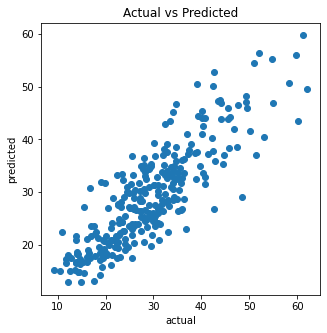

In [37]:
lin_model = build_and_eval_poly(df1,'Power dissipation (W)',2,0.3)

Linear Regression 
Training Score :  0.28623890701709753
Testing Score :  0.21648097755689266


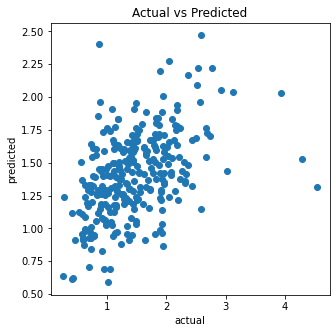

In [38]:
lin_model1 = build_and_eval_poly(df2,'Delay (s)',2,0.3)